# 단순회귀분석

In [ ]:
#기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 데이터 준비

In [ ]:
df = pd.read_csv("auto-mpg.csv", header = None) #csv 파일을 데이터프레임으로 변환
df.columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "name"] #열 이름 지정

#IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기 
pd.set_option("display.max_columns", 10)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


##데이터 탐색

In [ ]:
df.info() #데이터 자료형 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.describe() #데이터 요약정보 확인 - 문자열 자료형의 데이터는 제외됨

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
#"horsepower" 열의 자료형 변경(문자열 > 숫자)
df["horsepower"].unique() #열 고유값 확인

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [ ]:
df["horsepower"].replace("?", np.nan, inplace = True) #"?" 를 np.nan으로 변경(결측치 표현)
df.dropna(subset = ["horsepower"], axis = 0, inplace = True) #결측치가 존재하는 행 제거
df["horsepower"] = df["horsepower"].astype("float") #문자열을 실수형으로 변환 .astype("자료형")

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


##속성 선택

단순회귀분석의 변수로 사용할 후보열 선택
* 예측 목표(종속변수, Y): mpg
* 독립변수, X: cylinders, horsepower, weight


In [ ]:
#분석에 활용할 열(속성) 선택
ndf = df[["mpg", "cylinders", "horsepower", "weight"]]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


In [ ]:
#독립변수 찾기
#종속변수와 독립변수는 일대일 관게 有 - 두 변수 간 선형 관계가 있는지 그래프(산점도)를 통해 확인함

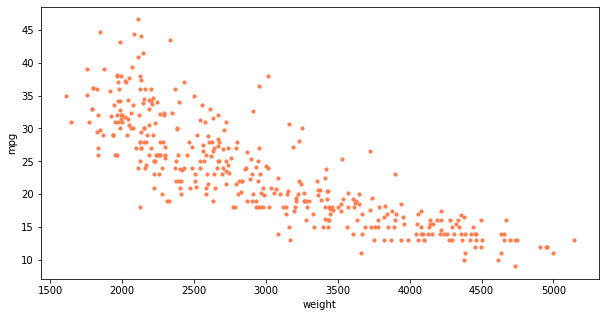

In [ ]:
#Matplotlib로 산점도 그리기
ndf.plot(kind = "scatter", x = "weight", y = "mpg", c = "coral", s = 10, figsize = (10, 5))
plt.show()
plt.close()

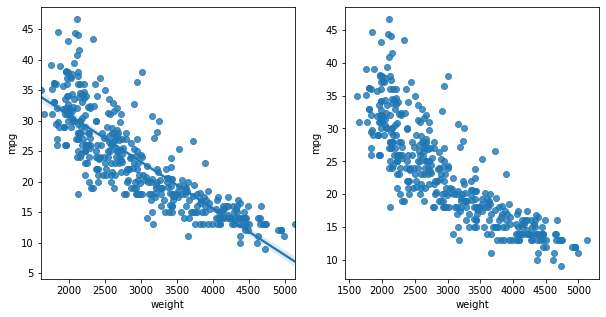

In [ ]:
#Seaborn으로 산점도 그리기 .regplot()
fig = plt.figure(figsize = (10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.regplot(x = "weight", y = "mpg", data = ndf, ax = ax1) #회귀선 표시
sns.regplot(x = "weight", y = "mpg", data = ndf, ax = ax2, fit_reg = False ) #회귀선 미표시
plt.show()
plt.close()

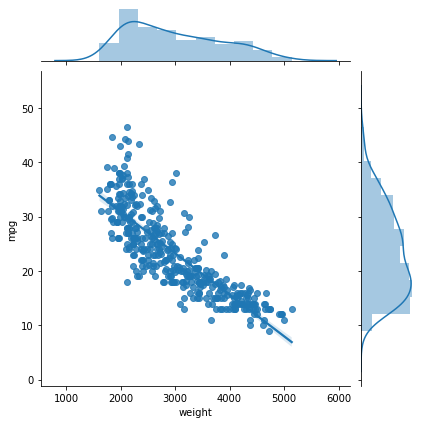

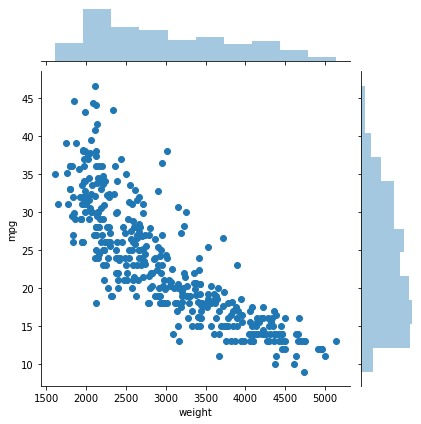

In [ ]:
#Seaborn으로 산점도 그리기 .jointplot() 
#두 변수의 히스토그램이 x, y축에 별도로 표시됨

sns.jointplot(x = "weight", y = "mpg", kind = "reg", data = ndf) #회귀선 표시
sns.jointplot(x = "weight", y = "mpg", data = ndf) #회귀선 미표시
plt.show()
plt.close()

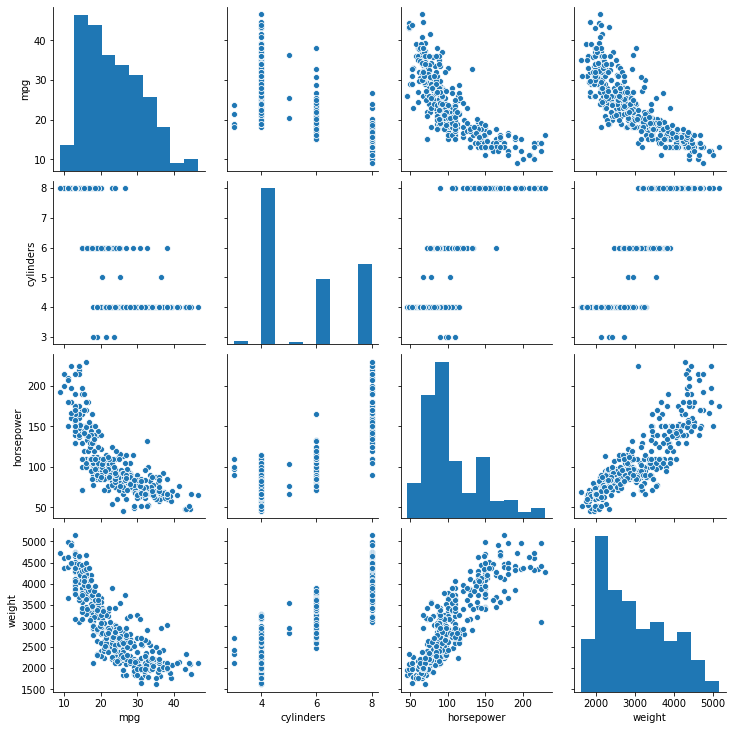

In [ ]:
#Seaborn으로 산점도 그리기 .pairplot()
#두 개씩 짝지을 수 있는 모든 경우의 수에 대한 산점도

grid_ndf = sns.pairplot(ndf)
plt.show()
plt.close()

##훈련/검증 데이터 분할

In [ ]:
#mpg 열과 선형 관계를 보이는 horsepower, weight 를 독립변수로 선택
X = ndf[["weight"]] #독립변수 X
y = ndf[["mpg"]] #종속변수 Y

In [ ]:
#train:test = 7:3 데이터 셋 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

##모형 학습 및 검증

### 모형 학습

In [ ]:
#단순회귀분석 모형 만들기 - sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
#단순회귀분석 모형 객체 생성
lr = LinearRegression()

In [ ]:
#train data로 모형 학습
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#학습을 마친 모형에 test data를 적용해 결정계수 계산
r_square = lr.score(X_test, y_test)
r_square

0.6822458558299322

In [ ]:
print("#회귀식의 기울기: ", lr.coef_)
print("#회귀식의 y절편: ", lr.intercept_)

#회귀식의 기울기:  [[-0.00775343]]
#회귀식의 y절편:  [46.71036626]


### 모형 검증

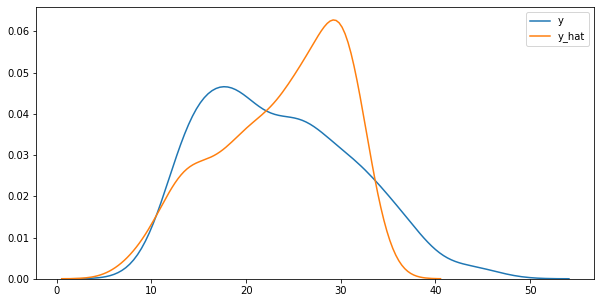

In [ ]:
#모형에 전체 X 데이터를 입력하여 예측한 값 y_hat 과 실제 값 y를 비교
y_hat = lr.predict(X)

plt.figure(figsize = (10, 5))
ax1 = sns.distplot(y, hist = False, label = "y")
ax2 = sns.distplot(y_hat, hist = False, label = "y_hat", ax = ax1)
plt.show()
plt.close()

# 다항회귀분석

비선형회귀분석 - sklearn 사용

In [ ]:
from sklearn.linear_model import LinearRegression #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures #다항식 변환

In [ ]:
#다항식 변환
poly = PolynomialFeatures(degree = 2) #2차항 적용
X_train_poly = poly.fit_transform(X_train) #X_train 데이터를 2차항으로 변형

In [ ]:
#train data로 모형 학습
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#학습을 마친 모형에 test data를 적용하여 결정계수 계산
X_test_poly = poly.fit_transform(X_test) #X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly, y_test)
r_square

0.7087009262975481

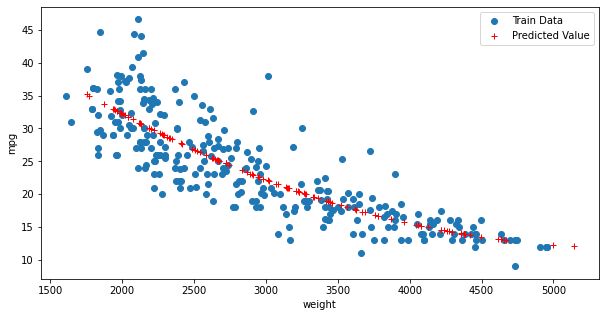

In [ ]:
#train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1, 1, 1) 
ax.plot(X_train, y_train, "o", label = "Train Data") #데이터 분포
ax.plot(X_test, y_hat_test, "r+", label = "Predicted Value") #모형이 학습한 회귀선
ax.legend(loc = "best")
plt.xlabel("weight")
plt.ylabel("mpg")
plt.show()
plt.close()

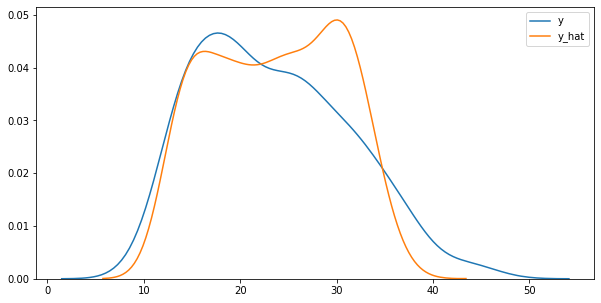

In [ ]:
#모형에 전체 X 데이터를 입력하여 예측한 값 y_hat 과 실제 값 y를 비교
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize = (10, 5))
ax1 = sns.distplot(y, hist = False, label = "y")
ax2 = sns.distplot(y_hat, hist = False, label = "y_hat", ax = ax1)
plt.show()
plt.close()

#다중회귀분석


여러 개의 독립변수가 종속변수에 영향을 주고 선형 관계를 갖는 경우

In [ ]:
#기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("auto-mpg.csv", header = None) #csv 파일을 데이터프레임으로 변환
df.columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "name"] #열 이름 지정

df["horsepower"].replace("?", np.nan, inplace = True) #"?" 를 np.nan으로 변경(결측치 표현)
df.dropna(subset = ["horsepower"], axis = 0, inplace = True) #결측치가 존재하는 행 제거
df["horsepower"] = df["horsepower"].astype("float") #문자열을 실수형으로 변환 .astype("자료형")

ndf = df[["mpg", "cylinders", "horsepower", "weight"]] #분석에 활용할 열 선택

In [ ]:
X = ndf[["cylinders", "horsepower", "weight"]] #독립변수 설정
y = ndf["mpg"] #종속변수 설정

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10) #데이터셋 분할

In [ ]:
lr = LinearRegression() #단순회귀분석 모형 객체 생성
lr.fit(X_train, y_train) #모형 학습

print("r_square = ", lr.score(X_test, y_test)) #결정계수 계산
print("X 변수의 계수 = ", lr.coef_)
print("상수항 = ", lr.intercept_)

r_square =  0.6939048496695599
X 변수의 계수 =  [-0.60691288 -0.03714088 -0.00522268]
상수항 =  46.414351269634025


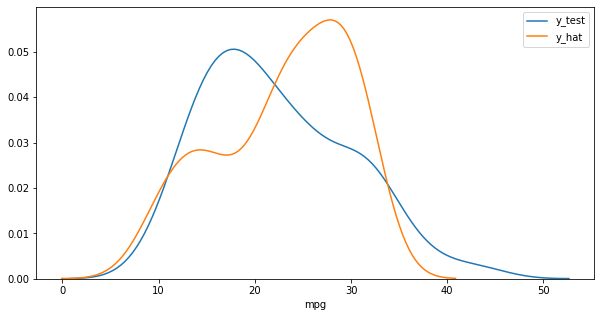

In [ ]:
y_hat = lr.predict(X_test)

plt.figure(figsize = (10, 5))
ax1 = sns.distplot(y_test, hist = False, label = "y_test")
ax2 = sns.distplot(y_hat, hist = False, label = "y_hat", ax = ax1)
plt.show()
plt.close()